<a href="https://colab.research.google.com/github/Nihavk28/ml-project/blob/main/Bank_Marketing_Success_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BANK MARKETING  SUCCESS PREDICTION**

**INTRODUCTION**


 A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution.Term deposit investments usually carry short term maturities ranging from one month to a few yearsand will have varying levels of required minimum deposits.
   
   The aim of this project is to build a machine learning model to predict
the success of the bank marketing campaign conducted by a portugese bank.From the given features the model predict whether the customer will subscribe to
the term deposit or not.

**1.Importing The Libraries**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,roc_auc_score,auc
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2.Importing The Dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Untitled folder/bankmar.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no





**3.Checking For Missing Values**

In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

**4.Checking The Data Types**

In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [ ]:
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [ ]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
df['education'].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [ ]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df['housing'].unique()


array(['yes', 'no'], dtype=object)

In [ ]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
df['poutcome'].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [ ]:
df['deposit'].unique()

array(['yes', 'no'], dtype=object)

**5.DATA VISUALISATION**

In [ ]:
numerical_features=[feature for feature in df.columns if ((df[feature].dtypes  !='object') & (feature not in ['deposit']))]
print('Number of numerical variables:',len(numerical_features))

Number of numerical variables: 7


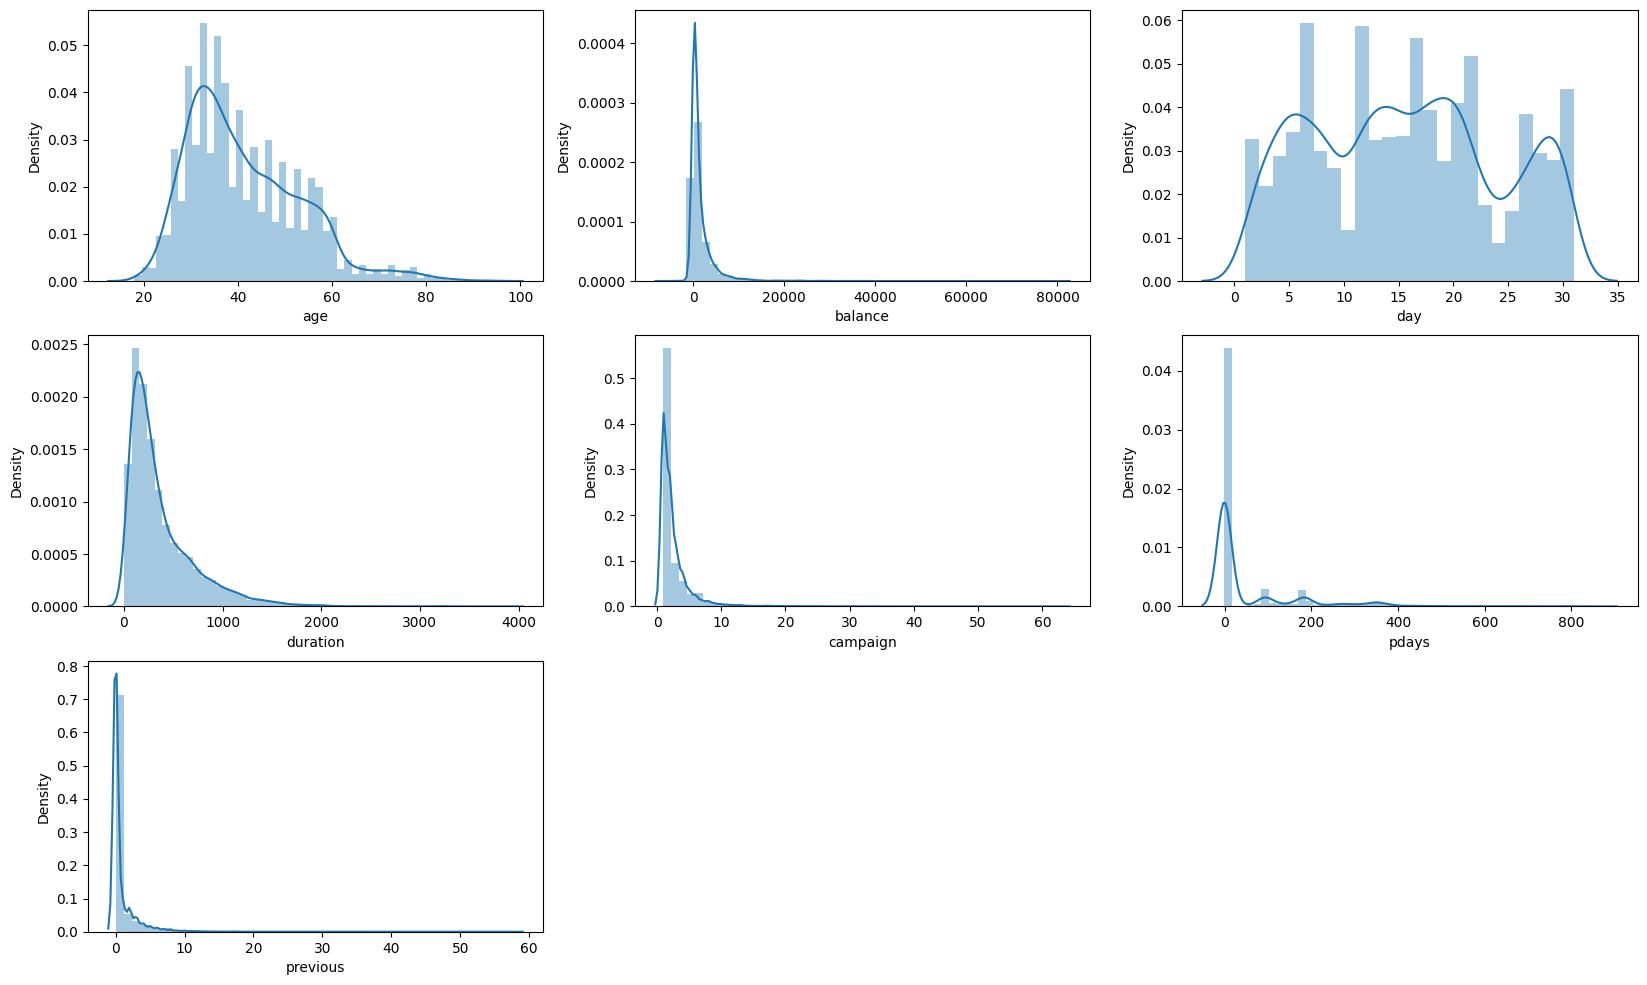

In [ ]:
plt.figure(figsize=(20,50),facecolor='white')
pt=1
for feature in numerical_features:
  ax=plt.subplot(12,3,pt)
  sns.distplot(df[feature])
  plt.xlabel(feature)
  pt+=1
plt.show()



1.  Age,days seems to be normally distributed, while others seems to have some outliers




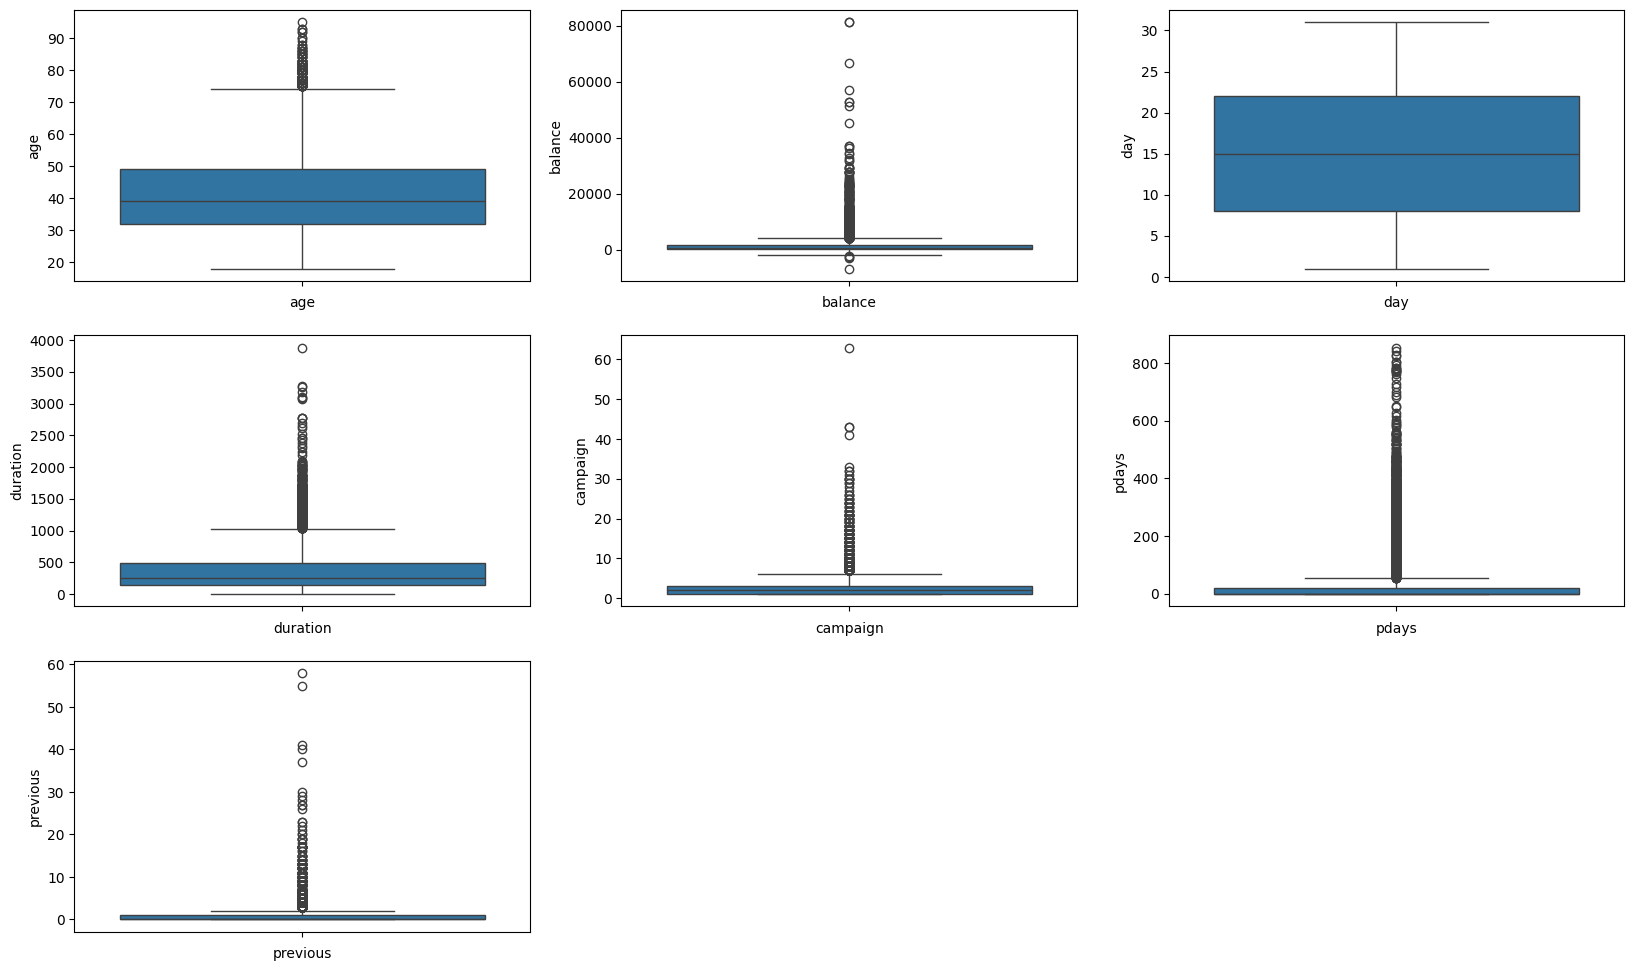

In [ ]:
plt.figure(figsize=(20,50),facecolor='white')
pt=1
for feature in numerical_features:
  ax=plt.subplot(12,3,pt)
  sns.boxplot(df[feature])
  plt.xlabel(feature)
  pt+=1
plt.show()

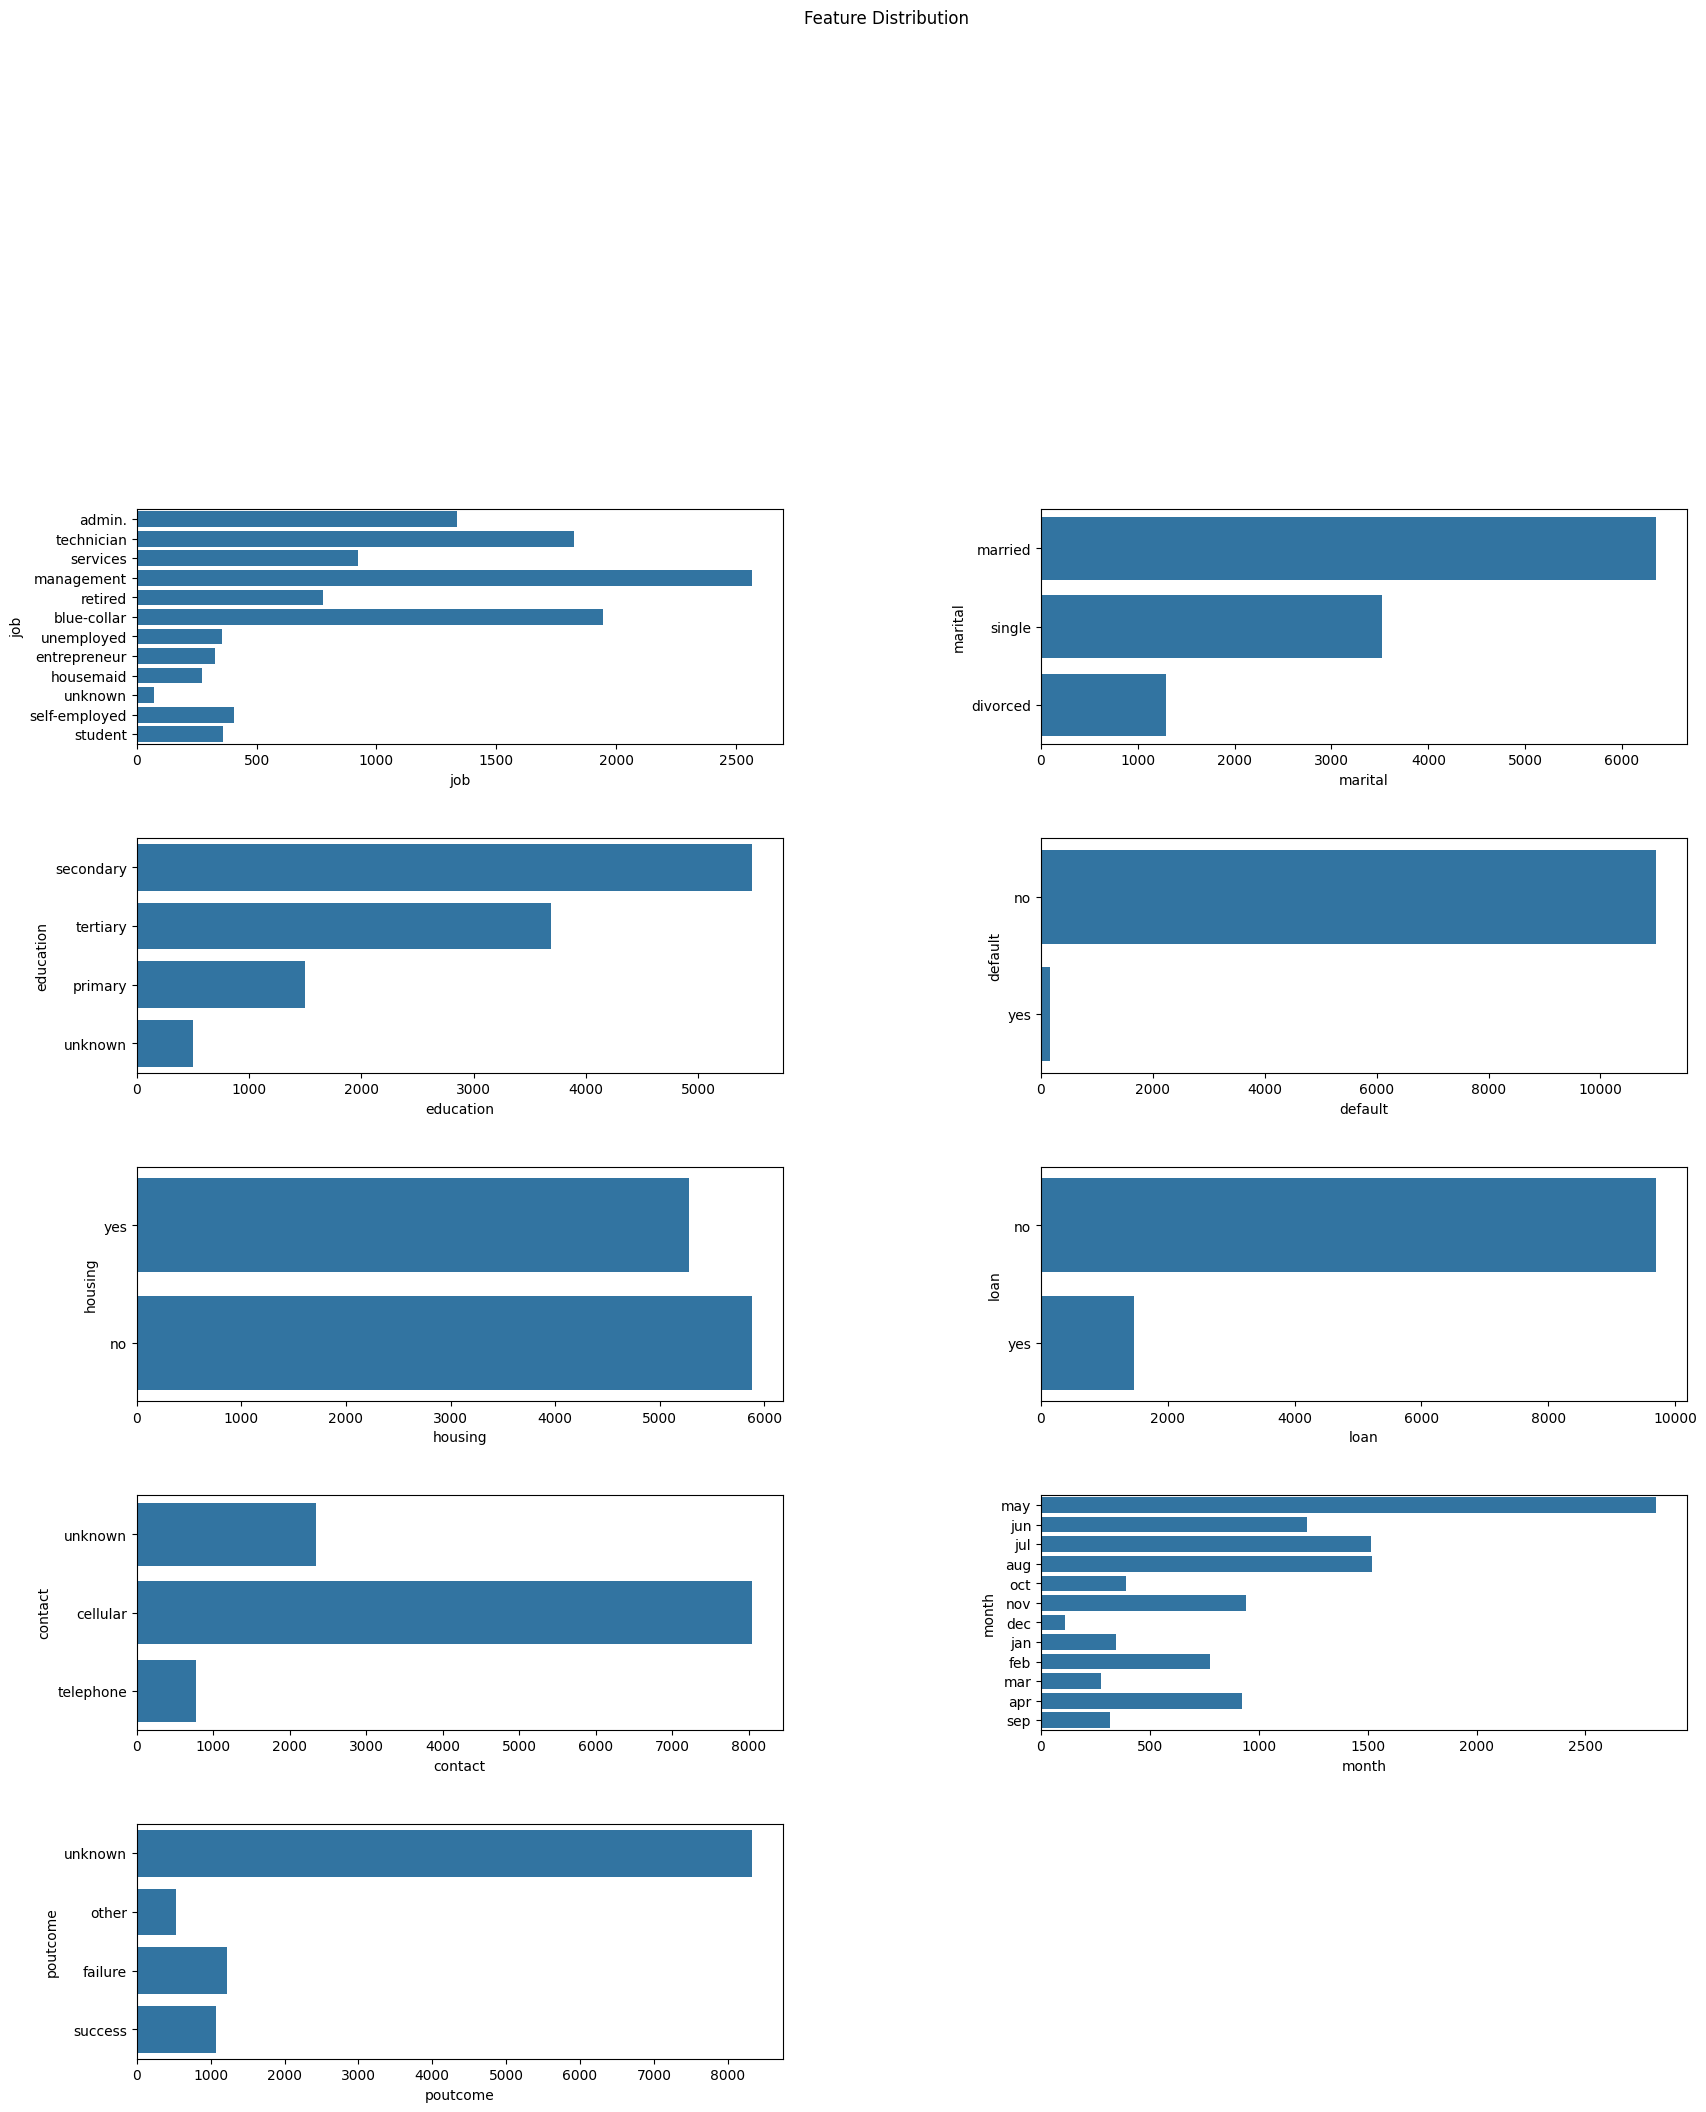

In [ ]:
categorical_features=['job','marital','education','default','housing','loan','contact','month','poutcome']
pt=1
plt.figure(figsize=(20,50),facecolor='white')
for i in categorical_features:
  plt.subplot(12,2,pt)
  plt.subplots_adjust(wspace=0.4,hspace=0.4)
  sns.countplot(y=i,data=df)
  plt.xlabel(i)
  plt.suptitle('Feature Distribution')
  pt+=1
plt.show()


Take Aways

1. Client with job type as management is high in number in the dataset and unknown is less.
2. There are more  married clients and divorced are less.
3. Clients with secondary educational background are high in the dataset
4. Data from month of is May is more in the dataset
5. The default has more number of nos




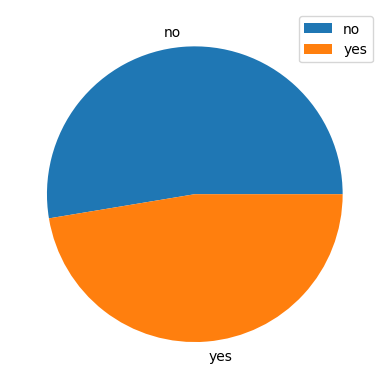

no     5873
yes    5289
Name: deposit, dtype: int64


In [ ]:
# pie chart
y=df['deposit'].value_counts()
lbl=['no','yes']
plt.pie(y,labels=lbl)
plt.legend()
plt.show()
print(y)

**7.Label Encoding**

In [ ]:
le=LabelEncoder()
df['job']=le.fit_transform(df['job'])
le1=LabelEncoder()
df['marital']=le1.fit_transform(df['marital'])
le2=LabelEncoder()
df['education']=le2.fit_transform(df['education'])
le3=LabelEncoder()
df['default']=le3.fit_transform(df['default'])
le4=LabelEncoder()
df['housing']=le4.fit_transform(df['housing'])
le5=LabelEncoder()
df['loan']=le5.fit_transform(df['loan'])
le6=LabelEncoder()
df['contact']=le6.fit_transform(df['contact'])
le7=LabelEncoder()
df['month']=le7.fit_transform(df['month'])
le8=LabelEncoder()
df['poutcome']=le8.fit_transform(df['poutcome'])
le9=LabelEncoder()
df['deposit']=le9.fit_transform(df['deposit'])

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [ ]:
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
deposit      int64
dtype: object

**7.Feature Scaling**

In [ ]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
age,1.000000,-0.031603,-0.442782,-0.126018,-0.011425,0.112300,-0.168700,-0.031418,0.027762,-0.000762,-0.026130,0.000189,-0.005278,0.002774,0.020169,-0.002699,0.034901
job,-0.031603,1.000000,0.078314,0.147046,-0.007066,0.028736,-0.136965,-0.067092,-0.087915,0.026589,-0.076011,0.002432,0.003104,-0.003385,0.012665,-0.004238,0.063395
marital,-0.442782,0.078314,1.000000,0.125845,-0.014691,-0.002138,-0.036345,-0.062029,-0.060456,-0.003642,-0.004070,0.006781,-0.030794,0.031200,0.031281,-0.039424,0.067610
education,-0.126018,0.147046,0.125845,1.000000,-0.010709,0.051728,-0.109168,-0.073154,-0.132540,0.016759,-0.055868,-0.019122,-0.005327,0.025165,0.022427,-0.040262,0.095948
default,-0.011425,-0.007066,-0.014691,-0.010709,1.000000,-0.060954,0.011076,0.076434,0.035709,0.017342,0.000950,-0.009760,0.030975,-0.036282,-0.035273,0.042357,-0.040680
balance,0.112300,0.028736,-0.002138,0.051728,-0.060954,1.000000,-0.077092,-0.084589,-0.027295,0.010467,0.007264,0.022436,-0.013894,0.017411,0.030805,-0.027151,0.081129
housing,-0.168700,-0.136965,-0.036345,-0.109168,0.011076,-0.077092,1.000000,0.076761,0.226392,-0.014770,0.219602,0.035051,0.006660,0.064497,-0.000840,-0.046370,-0.203888
loan,-0.031418,-0.067092,-0.062029,-0.073154,0.076434,-0.084589,0.076761,1.000000,0.006829,0.017269,0.025329,-0.001914,0.034722,-0.030416,-0.022668,0.026344,-0.110580
contact,0.027762,-0.087915,-0.060456,-0.132540,0.035709,-0.027295,0.226392,0.006829,1.000000,0.007943,0.289803,-0.018000,0.059258,-0.227785,-0.169919,0.257993,-0.249847
day,-0.000762,0.026589,-0.003642,0.016759,0.017342,0.010467,-0.014770,0.017269,0.007943,1.000000,-0.019840,-0.018511,0.137007,-0.077232,-0.058981,0.080221,-0.056326


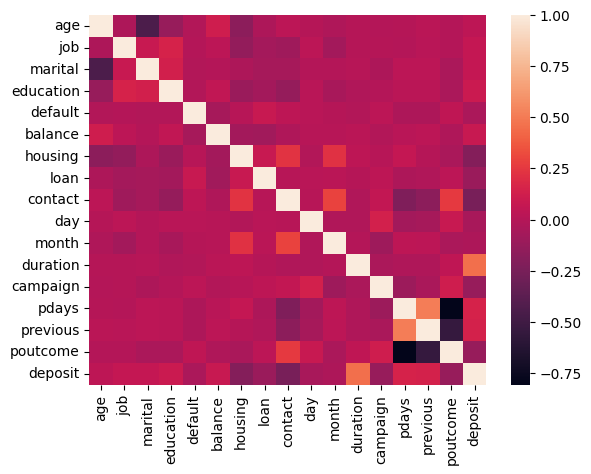

In [ ]:
corr_plot=sns.heatmap(df.corr())

**8.scaling**

In [ ]:
X=df.iloc[:,:-1]
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0


In [ ]:
y=df.iloc[:,-1]
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.53246753, 0.        , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.49350649, 0.        , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.2987013 , 0.81818182, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.18181818, 0.81818182, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.32467532, 0.81818182, 0.5       , ..., 0.20233918, 0.0862069 ,
        0.        ],
       [0.20779221, 0.81818182, 0.5       , ..., 0.        , 0.        ,
        1.        ]])

**9.Splitting The Dataset Into The Training Set And Test Data**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=2)

## **10.Classification**

**10.1.K NEAREST NEIGHBORS CLASSIFICATION**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)




KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred=knn.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [ ]:
y_test

10772    0
2914     1
6041     0
3926     1
866      1
        ..
3180     1
5449     0
4556     1
8623     0
8403     0
Name: deposit, Length: 3349, dtype: int64

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      1769
           1       0.73      0.63      0.68      1580

    accuracy                           0.72      3349
   macro avg       0.72      0.71      0.71      3349
weighted avg       0.72      0.72      0.71      3349



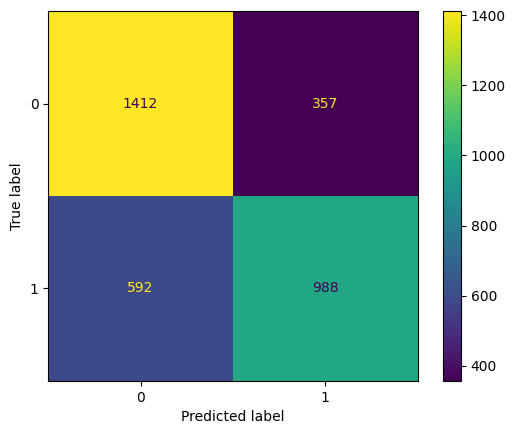

In [ ]:
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


**10.2.Support Vector Classification**

In [ ]:
sv=SVC(kernel='rbf')
sv.fit(X_train,y_train)


SVC()

In [ ]:
y_pred1=sv.predict(X_test)
y_pred1

array([0, 0, 1, ..., 1, 0, 0])

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1769
           1       0.81      0.78      0.79      1580

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



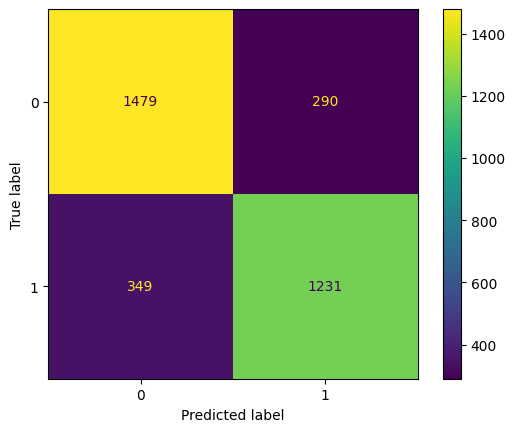

In [ ]:
print(classification_report(y_test,y_pred1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred1))

**10.3.Decision Tree Classification**

In [ ]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=4,splitter='best',random_state=1)
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

In [ ]:
y_pred2=dt.predict(X_test)
y_pred2

array([0, 0, 0, ..., 1, 0, 0])

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1769
           1       0.81      0.69      0.74      1580

    accuracy                           0.77      3349
   macro avg       0.78      0.77      0.77      3349
weighted avg       0.78      0.77      0.77      3349



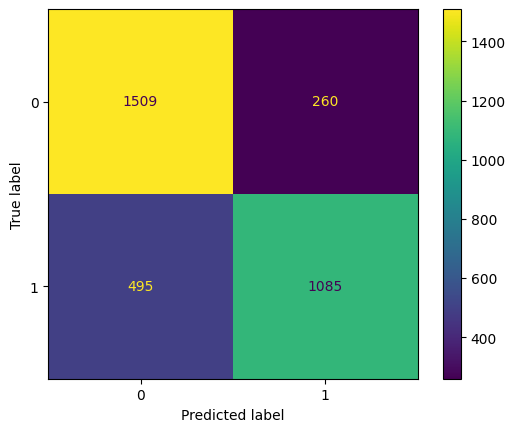

In [ ]:
print(classification_report(y_test,y_pred2))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred2))

**10.4.AdaBoost Classifier**

In [ ]:
ad=AdaBoostClassifier(random_state=1)
ad.fit(X_train,y_train)


AdaBoostClassifier(random_state=1)

In [ ]:
y_pred3=ad.predict(X_test)
y_pred3

array([0, 0, 0, ..., 1, 1, 0])

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1769
           1       0.81      0.79      0.80      1580

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



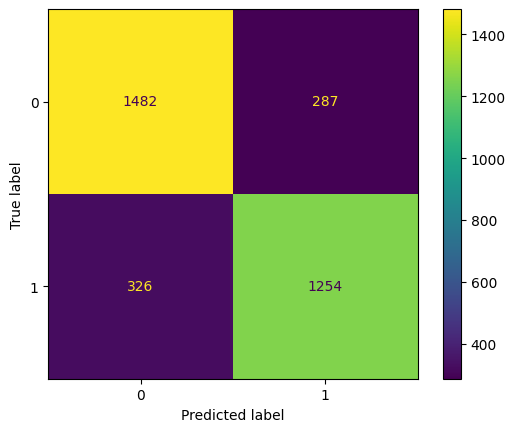

In [ ]:
print(classification_report(y_test,y_pred3))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred3))

**10.5.XGBOOST Classification**




In [ ]:
xg=XGBClassifier(n_estimator=800,random_state=1)
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=800, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred4=xg.predict(X_test)
y_pred4

array([0, 0, 0, ..., 1, 0, 0])

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1769
           1       0.83      0.87      0.85      1580

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349



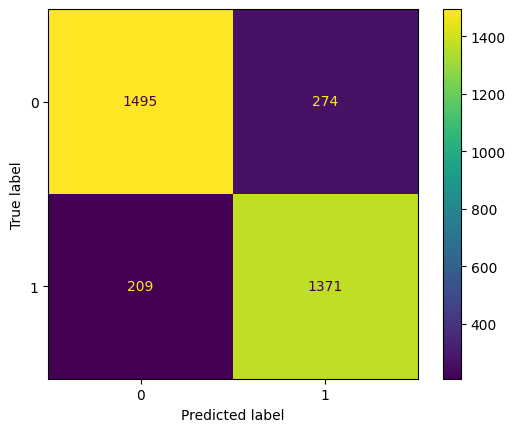

In [ ]:
print(classification_report(y_test,y_pred4))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred4))

**10.6.Random Forest Classification**

In [ ]:

rf=RandomForestClassifier(criterion='entropy',max_depth=4,random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, random_state=1)

In [ ]:
y_pred5=rf.predict(X_test)
y_pred5

array([0, 0, 1, ..., 1, 0, 0])

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1769
           1       0.80      0.80      0.80      1580

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



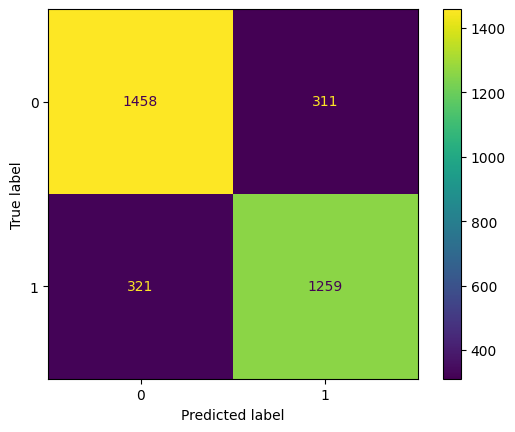

In [ ]:
print(classification_report(y_test,y_pred5))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred5))

**11.Hyper Parameter Tuning And Creating Model With Parameters Obtained From Hyper Parameter Tuning**

In [ ]:
# params = {'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],'metric':['minkowski','euclidean','manhattan']}
# gd = GridSearchCV(knn, params, scoring='accuracy', cv=5)
# gd.fit(X_train, y_train)

In [ ]:
# print(gd.best_params_)

In [ ]:
knn1=KNeighborsClassifier(metric='manhattan',n_neighbors=9,weights='distance')
knn1.fit(X_train,y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [ ]:
y_pred_knn=knn1.predict(X_test)
y_pred_knn

array([0, 0, 1, ..., 1, 1, 0])

              precision    recall  f1-score   support

           0       0.73      0.85      0.79      1769
           1       0.80      0.65      0.71      1580

    accuracy                           0.76      3349
   macro avg       0.76      0.75      0.75      3349
weighted avg       0.76      0.76      0.75      3349



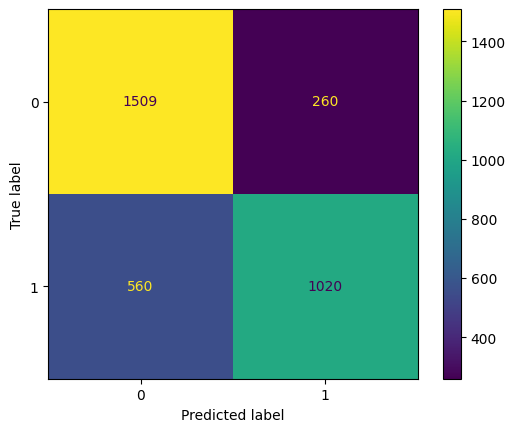

In [ ]:
print(classification_report(y_test,y_pred_knn))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn))

In [ ]:
# params = {'kernel':['rbf','linear'],'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}
# gd = GridSearchCV(sv, params,refit=True,verbose=3)
# gd.fit(X_train, y_train)

In [ ]:
# print(gd.best_params_)

In [ ]:
sv1=SVC(kernel='rbf',C=100,gamma=0.01)
sv1.fit(X_train,y_train)

SVC(C=100, gamma=0.01)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1769
           1       0.80      0.78      0.79      1580

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



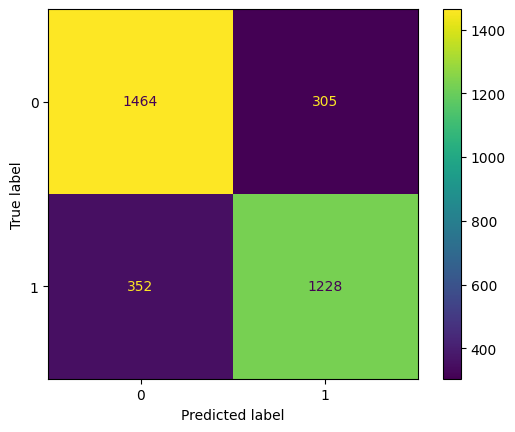

In [ ]:
y_pred_sv=sv1.predict(X_test)

print(classification_report(y_test,y_pred_sv))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sv))

In [ ]:
# params = {'criterion':['gini','entropy'],'max_depth':range(1,10),'min_samples_split':range(1,10),'min_samples_leaf':range(1,5)}
# gd = GridSearchCV(dt, params, cv=5,verbose=1)
# gd.fit(X_train, y_train)

In [ ]:
# print(gd.best_params_)

In [ ]:
dt1=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=1,min_samples_split=7)
dt1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=7)

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1769
           1       0.82      0.81      0.82      1580

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



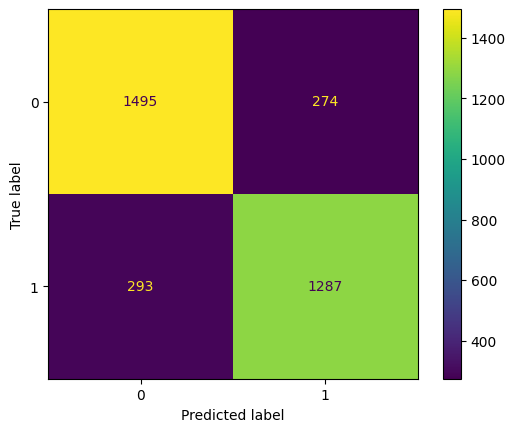

In [ ]:
y_pred_dt=dt1.predict(X_test)
print(classification_report(y_test,y_pred_dt))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt))

In [ ]:
# params={'n_estimators':[50,70,90,120],'learning_rate':[0.01,0.1,1]}
# gd = GridSearchCV(ad, params,verbose=3,scoring='f1')
# gd.fit(X_train, y_train)


In [ ]:
# print(gd.best_params_)

In [ ]:
ad1=AdaBoostClassifier(learning_rate=1,n_estimators=120)
ad1.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=120)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1769
           1       0.83      0.79      0.81      1580

    accuracy                           0.82      3349
   macro avg       0.83      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



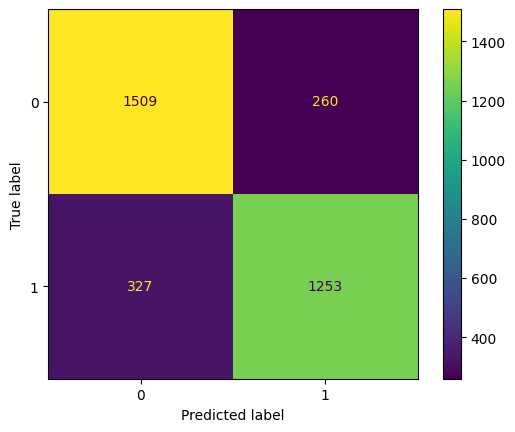

In [ ]:
y_pred_ad=ad1.predict(X_test)
print(classification_report(y_test,y_pred_ad))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_ad))

In [ ]:
# params = {'n_estimators':[100,300,500,1000],'subsample':[0.6,0.8,1.0], 'max_depth': [3,4,5], 'learning_rate': [0.1, 0.01,0.05]}
# gd = GridSearchCV(xg, params, scoring='neg_log_loss', cv=5)
# gd.fit(X_train, y_train)


In [ ]:
# print(gd.best_params_)

In [ ]:
xg1=XGBClassifier(n_estimator=300,learning_rate=0.05,max_depth=5,subsample=0.8,random_state=1)
xg1.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=300, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_new=xg1.predict(X_test)
y_pred_new

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1769
           1       0.83      0.85      0.84      1580

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



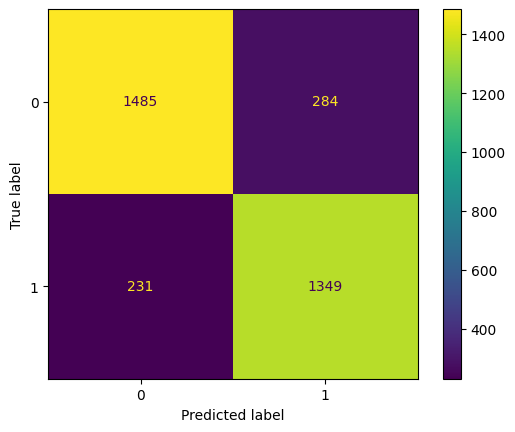

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_new))

In [ ]:
# params = {'max_depth':range(1,15),'max_features':range(1,15)}
# gd = GridSearchCV(rf, params, cv=5,scoring='accuracy')
# gd.fit(X_train, y_train)

In [ ]:
# print(gd.best_params_)

In [ ]:
rf1=RandomForestClassifier(max_depth=14,max_features=7,random_state=1)
rf1.fit(X_train,y_train)

RandomForestClassifier(max_depth=14, max_features=7, random_state=1)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1769
           1       0.82      0.86      0.84      1580

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



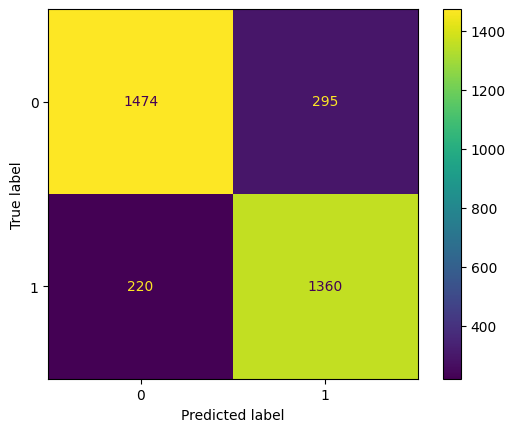

In [ ]:
y_pred_rf=rf1.predict(X_test)
print(classification_report(y_test,y_pred_rf))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf))

### **12.ROC Curve**

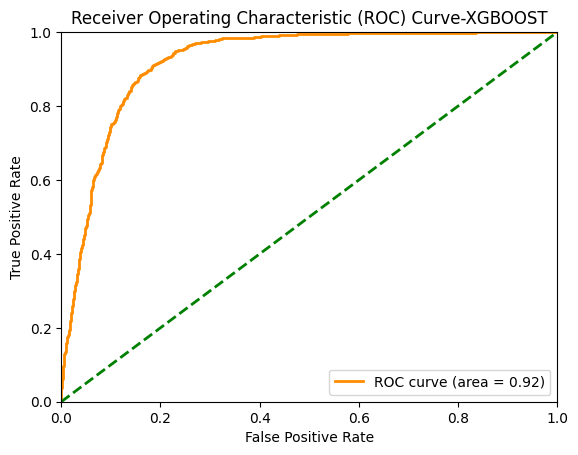

In [ ]:
#ROC curve
y_score = xg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
# Plot ROC curve

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='Green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic (ROC) Curve-XGBOOST")
plt.legend(loc="lower right")
plt.show()




**13.Prediction On New Data**

In [ ]:
y_new=xg.predict(scaler.transform([[59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3]]))
y_new1=y_new.item()
y_new1
if y_new1==0:
  print("Client will not subscribe a term deposit")
else:
  print("client will subscribe a term deposit")



client will subscribe a term deposit


**14.Deploy The Prediction**




In [ ]:
import pickle
pickle.dump(xg,open('model_d.sav','wb'))


In [ ]:

pickle.dump(scaler,open('scaler_00.sav','wb'))